In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import ee

In [25]:
ee.Authenticate()
ee.Initialize()

KeyboardInterrupt: 

In [14]:
useful_crimes = gpd.read_file('filtered dataset/crimes_filtered.shp')
useful_crimes.to_crs('EPSG:4326', inplace=True)

In [13]:
manz = gpd.read_file('nyct2020_23b/nyct2020.shp')
manz.to_crs('EPSG:4326', inplace=True)
manz.head(1)

,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape_Leng,Shape_Area,geometry
0,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,4121,10833.043929,1.843005e+06,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."


In [17]:
useful_crimes.head(1)

,cmplnt_num,addr_pct_c,boro_nm,date_cmpln,time_cmpln,cmplnt_fr_,date_cmp_2,time_cmp_2,cmplnt_to_,crm_atpt_c,...,susp_sex,transit_di,vic_age_gr,vic_race,vic_sex,x_coord_cd,y_coord_cd,latitude,longitude,geometry
0,262612530,110.0,QUEENS,2022-09-09,00:00:00.000,00:55:00,2022-09-09,00:00:00.000,01:19:00,COMPLETED,...,M,NaN,25-44,WHITE HISPANIC,F,1019164.0,210169.0,40.743481,-73.874004,POINT (-73.87400 40.74348)


### 1. Importaciones y preprocesamiento

In [24]:

poly = manz.envelope.geometry.iloc[0]
xy = list(poly.exterior.coords)
aoi = ee.Geometry.Polygon(xy)

In [ ]:
collection = ee.ImageCollection('LANDSAT').filterBounds(aoi).filterDate('2022-12-30', '2023-04-29')
images=collection.aggregate_array('system:id').getInfo()

AttributeError: 'MultiPolygon' object has no attribute 'plot'

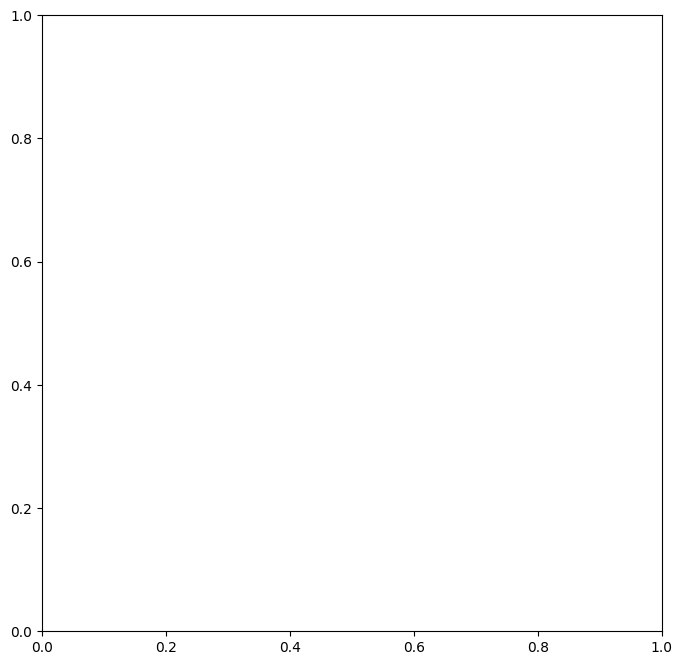

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
city.plot(ax=ax, color="darkgreen", zorder=0)

plt.title("Acceso Deficiente a Agua Potable Rural", size=20)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.show()
